<span style="display: block; padding: 20px; background-color: blue; color: yellow; font-weight: bold; text-align: center; font-size: 40px;">IPL Match Win Probability Predictor</span>

<span style="display: block; padding: 10px; background-color: lightpink; color: black; font-weight: bold; text-align: left; font-size: 24px;">Step 1: Importing Libraries</span>


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<span style="display: block; padding: 10px; background-color: lightpink; color: black; font-weight: bold; text-align: left; font-size: 24px;">Step 2: Loading the Datasets</span>

**1. matches.xlsx**

The 'matches.xlsx' dataset contains information about Indian Premier League (IPL) matches. Here are some key columns and a brief description of each:

- id: An identifier for each match.
- Season: The IPL season in which the match took place (e.g., IPL-2017).
- city: The city where the match was held.
- date: The date on which the match occurred.
- team1, team2: The teams playing in the match.
- toss_winner: The team winning the toss.
- toss_decision: The decision taken by the toss winner (batting or fielding).
- result: The result of the match (normal, tie, no result, etc.).
- dl_applied: Whether the Duckworth-Lewis method was applied (1 if yes, 0 if no).
- winner: The winning team of the match.
- win_by_runs, win_by_wickets: The margin of victory for the winning team in terms of runs or wickets.
- player_of_match: The player who received the Man of the Match award.
- venue: The venue or stadium where the match was played.
- umpire1, umpire2, umpire3: The umpires officiating the match.

In [2]:
# Loading matches dataset

matches = pd.read_excel('matches.xlsx')

matches.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,2017-05-04 00:00:00,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,2017-06-04 00:00:00,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,2017-07-04 00:00:00,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,2017-08-04 00:00:00,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,2017-08-04 00:00:00,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


**2. deliveries.xlsx**

The "deliveries.xlsx" dataset provides detailed information about deliveries bowled in IPL matches. Here are some key columns and a brief description:

- match_id: Corresponds to the id in the Matches dataset, linking the deliveries to specific matches.
- inning: The inning number (1st or 2nd inning).
- batting_team, bowling_team: The teams batting and bowling in the specific inning.
- over, ball: The over and ball number of the delivery.
- batsman, non_striker, bowler: The players involved in the delivery (batsman, non-striker, and bowler).
- is_super_over: Indicates if the delivery is part of a Super Over (1 if yes, 0 if no).
- wide_runs, bye_runs, legbye_runs, noball_runs, penalty_runs: Different types of extra runs conceded in the delivery.
- batsman_runs: The runs scored by the batsman on that delivery.
- extra_runs: The total extra runs (wide, bye, legbye, noball, penalty) in that delivery.
- total_runs: The total runs (including batsman runs and extra runs) scored on that delivery.
- player_dismissed: The batsman dismissed on that delivery (if any).
- dismissal_kind: The type of dismissal (e.g., caught, bowled, lbw).
- fielder: The player who fielded the ball leading to a dismissal.

In [3]:
# Loading the deliveries dataset

deliveries = pd.read_excel('deliveries.xlsx')

deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


The **deliveries.xlsx** dataset is related to the **matches.xlsx** dataset through the common identifier **match_id**." The match_id in the deliveries dataset allows us to associate each delivery with a specific match from the matches dataset, enabling a comprehensive analysis of individual deliveries within the context of the overall match information.

<span style="display: block; padding: 10px; background-color: lightpink; color: black; font-weight: bold; text-align: left; font-size: 24px;">Step 3: Data Analysis, clearning, EDA & Feature Engineering</span>

In [4]:
# Checking the shape of both datasets

matches.shape,deliveries.shape

((756, 18), (179078, 21))

In [5]:
# Column names in deliveries dataset

deliveries.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

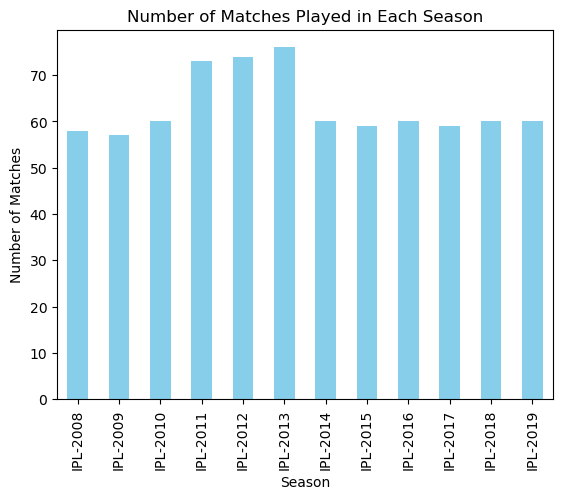

In [6]:
# Bar chart showing the number of matches played in each IPL season.

season_counts = matches['Season'].value_counts().sort_index()
season_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Matches Played in Each Season')
plt.xlabel('Season')
plt.ylabel('Number of Matches')
plt.show()


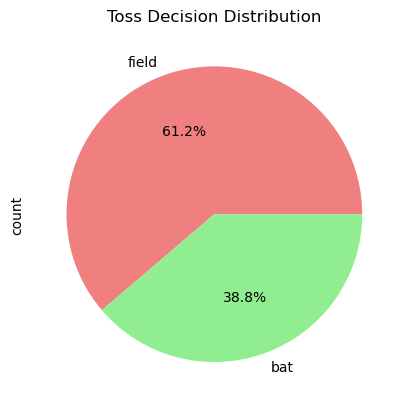

In [7]:
# Pie chart illustrating the distribution of toss decisions (batting/fielding) across all matches.

toss_decision_counts = matches['toss_decision'].value_counts()
toss_decision_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.title('Toss Decision Distribution')
plt.show()


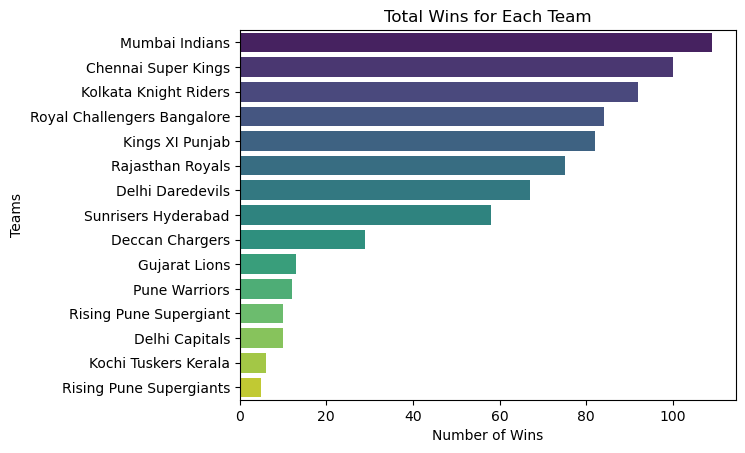

In [8]:
# Bar chart showing the total number of wins for each team.

team_wins = matches['winner'].value_counts()
sns.barplot(x=team_wins.values, y=team_wins.index, palette="viridis")
plt.title('Total Wins for Each Team')
plt.xlabel('Number of Wins')
plt.ylabel('Teams')
plt.show()

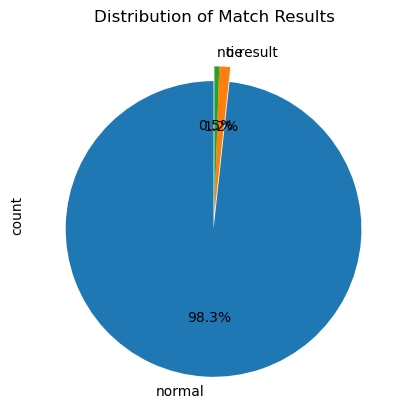

In [9]:
# Pie chart showing the distribution of match results.

result_counts = matches['result'].value_counts()
result_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, explode=(0.1, 0, 0))
plt.title('Distribution of Match Results')
plt.show()

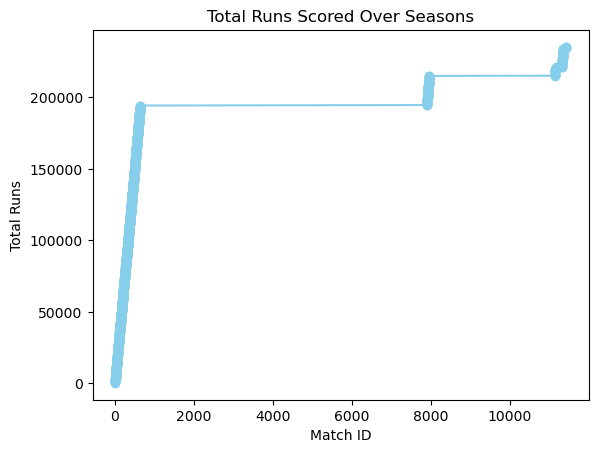

In [10]:
# Line plot depicting the trend of total runs scored over the seasons.

runs_over_seasons = deliveries.groupby('match_id')['total_runs'].sum().cumsum()
runs_over_seasons.plot(kind='line', marker='o', color='skyblue')
plt.title('Total Runs Scored Over Seasons')
plt.xlabel('Match ID')
plt.ylabel('Total Runs')
plt.show()

In [11]:
# grouping the 1st innings,2nd innings score in a particular matchid
# lets say match id = 1,so inning 1 score = 207,inning 2 score = 172,in that way

totalrun_df = deliveries.groupby(['match_id','inning']).sum()['total_runs'].reset_index()

totalrun_df

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
...,...,...,...
1523,11413,2,170
1524,11414,1,155
1525,11414,2,162
1526,11415,1,152


In [12]:
# capturing only the first innings,as we will be predicting for the second innnigs

totalrun_df = totalrun_df[totalrun_df['inning']==1]
totalrun_df['total_runs'] = totalrun_df['total_runs'].apply(lambda x:x+1)
totalrun_df

C:\Users\kavit\AppData\Local\Temp\ipykernel_32704\3234705694.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  totalrun_df['total_runs'] = totalrun_df['total_runs'].apply(lambda x:x+1)


,match_id,inning,total_runs
0,1,1,208
2,2,1,185
4,3,1,184
6,4,1,164
8,5,1,158
...,...,...,...
1518,11347,1,144
1520,11412,1,137
1522,11413,1,172
1524,11414,1,156


In [13]:
matches.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [14]:
'''
Merging the total first innings score df with the matches df,
where left side merging is done on "id" column of the matches
and right side merging is done on "match_id" column of the totalrun_df

'''

match_df = matches.merge(totalrun_df[['match_id','total_runs']],
                       left_on='id',right_on='match_id')

match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,2017-05-04 00:00:00,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,208
1,2,IPL-2017,Pune,2017-06-04 00:00:00,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,185
2,3,IPL-2017,Rajkot,2017-07-04 00:00:00,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,184
3,4,IPL-2017,Indore,2017-08-04 00:00:00,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,164
4,5,IPL-2017,Bangalore,2017-08-04 00:00:00,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,158


In [15]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [16]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [17]:
# replacing the Delhi Daredevils with Delhi Capitals

match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')


# replacing the Deccan Chargers with Sunrises Hyderabad

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')



In [18]:
# will consider only frequently occuring teams,
# which are mentioned in the teams list

match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Capitals',
       'Mumbai Indians', 'Chennai Super Kings', 'Rajasthan Royals'],
      dtype=object)

In [19]:
match_df.shape

(641, 20)

In [20]:
match_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,2017-05-04 00:00:00,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,208
4,5,IPL-2017,Bangalore,2017-08-04 00:00:00,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,158
6,7,IPL-2017,Mumbai,2017-09-04 00:00:00,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,7,179
7,8,IPL-2017,Indore,2017-10-04 00:00:00,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,8,149
9,10,IPL-2017,Mumbai,2017-12-04 00:00:00,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN,10,159


In [21]:
# checking the matches which resulted in dl method

match_df[match_df['dl_applied']==1].style.background_gradient(cmap = 'plasma')

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
56,57,IPL-2017,Bangalore,17-05-2017,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,0,7,NM Coulter-Nile,M Chinnaswamy Stadium,AK Chaudhary,Nitin Menon,nan,57,129
99,100,IPL-2008,Delhi,17-05-2008,Delhi Capitals,Kings XI Punjab,Delhi Daredevils,bat,normal,1,Kings XI Punjab,6,0,DPMD Jayawardene,Feroz Shah Kotla,AV Jayaprakash,RE Koertzen,nan,100,119
102,103,IPL-2008,Kolkata,18-05-2008,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,normal,1,Chennai Super Kings,3,0,M Ntini,Eden Gardens,Asad Rauf,K Hariharan,nan,103,150
119,120,IPL-2009,Cape Town,19-04-2009,Kings XI Punjab,Delhi Capitals,Delhi Daredevils,field,normal,1,Delhi Daredevils,0,10,DL Vettori,Newlands,MR Benson,SD Ranade,nan,120,105
122,123,IPL-2009,Durban,21-04-2009,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,11,0,CH Gayle,Kingsmead,DJ Harper,SD Ranade,nan,123,159
148,149,IPL-2009,Centurion,2009-07-05 00:00:00,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,1,Chennai Super Kings,12,0,ML Hayden,SuperSport Park,DJ Harper,TH Wijewardene,nan,149,186
280,281,IPL-2011,Kolkata,2011-07-05 00:00:00,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,1,Kolkata Knight Riders,10,0,Iqbal Abdulla,Eden Gardens,Asad Rauf,PR Reiffel,nan,281,115
290,291,IPL-2011,Bangalore,14-05-2011,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,1,Royal Challengers Bangalore,0,4,CH Gayle,M Chinnaswamy Stadium,RE Koertzen,RB Tiffin,nan,291,90
488,489,IPL-2014,Delhi,2014-10-05 00:00:00,Delhi Capitals,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,1,Sunrisers Hyderabad,0,8,DW Steyn,Feroz Shah Kotla,RM Deshpande,BNJ Oxenford,nan,489,144
536,537,IPL-2015,Visakhapatnam,22-04-2015,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Sunrisers Hyderabad,16,0,DA Warner,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,RK Illingworth,VA Kulkarni,nan,537,177


In [22]:
# ignoring the rows which were DL method

match_df = match_df[match_df['dl_applied']==0]

# considering the match_id,city,winner and total runs

match_df = match_df[['match_id','city','winner','total_runs']]

match_df

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,208
4,5,Bangalore,Royal Challengers Bangalore,158
6,7,Mumbai,Mumbai Indians,179
7,8,Indore,Kings XI Punjab,149
9,10,Mumbai,Mumbai Indians,159
...,...,...,...,...
751,11347,Mumbai,Mumbai Indians,144
752,11412,Chennai,Mumbai Indians,137
753,11413,Visakhapatnam,Delhi Capitals,172
754,11414,Visakhapatnam,Chennai Super Kings,156


In [23]:
deliveries.head(3)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [24]:
# merging matchdf with delevieries on match_id

delivery_df = match_df.merge(deliveries,on='match_id')

delivery_df.head(5)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,Hyderabad,Sunrisers Hyderabad,208,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [25]:
delivery_df.columns

Index(['match_id', 'city', 'winner', 'total_runs_x', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs_y',
       'player_dismissed', 'dismissal_kind', 'fielder'],
      dtype='object')

In [26]:
# considering the 2nd innings 

delivery_df = delivery_df[delivery_df['inning'] == 2]
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [27]:
delivery_df.shape

(72413, 24)

In [28]:
'''
So by observation we can observe that in the matchdf we had taken
firstinnings total runs,right and in the second case,that is in the 
delivery dataframe we considered second inning runs,as our main aim
is to find the probability of either teams to win or loose,we need 
current runs and runrate,so for current runs,we can apply groupby
on matchid and take the cummulative sum wrt total_runs_y,now,basically
totalruns was present in matchdf as well as deliveries_df,but as we merged
both the dataframes,it resulted in total_runs_x,and total_runs_y,
so total_runs_x is the first innings runs and total_runs_y are the second
innings runs,ball by ball,by applying cummulative sum,this becomes 
current score


total_runs_y gives the run scored after each ball,so in the second innings,
we want to get the total second innings runs,so we will groupby match id
and will apply the cummulative sum


'''

# Convert 'total_runs_y' to a numerical type (assuming it represents runs)
delivery_df['total_runs_y'] = delivery_df['total_runs_y'].astype(float)  # or int, depending on the nature of your data

# Calculate cumulative sum of runs for each match
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

# Display the updated DataFrame
delivery_df.head()


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,1,0,1.0,NaN,NaN,NaN,1.0
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0.0,NaN,NaN,NaN,1.0
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0.0,NaN,NaN,NaN,1.0
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,2,0,2.0,NaN,NaN,NaN,3.0
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,4,0,4.0,NaN,NaN,NaN,7.0


C:\Users\kavit\AppData\Local\Temp\ipykernel_32704\834208261.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='over', y='total_runs_y', data=delivery_df, ci=None, color='skyblue', alpha=0.7, label='Runs in Each Over')


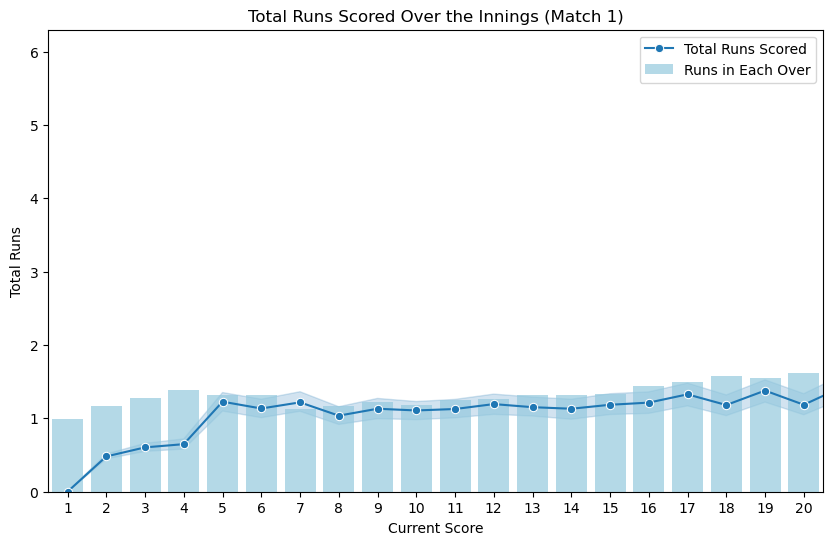

In [29]:
# Filter the data for the specified match_id
match_data = deliveries[deliveries['match_id'] == 1]

# Line plot for total runs scored over the innings
plt.figure(figsize=(10, 6))
sns.lineplot(x='current_score', y='total_runs_y', data=delivery_df, marker='o', label='Total Runs Scored')

# Bar plot for runs scored in each over
sns.barplot(x='over', y='total_runs_y', data=delivery_df, ci=None, color='skyblue', alpha=0.7, label='Runs in Each Over')

plt.title('Total Runs Scored Over the Innings (Match 1)')
plt.xlabel('Current Score')
plt.ylabel('Total Runs')
plt.legend()
plt.show()


C:\Users\kavit\AppData\Local\Temp\ipykernel_32704\3417030496.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='batsman', y='batsman_runs', data=match_data, ci=None, estimator=sum, palette='viridis')


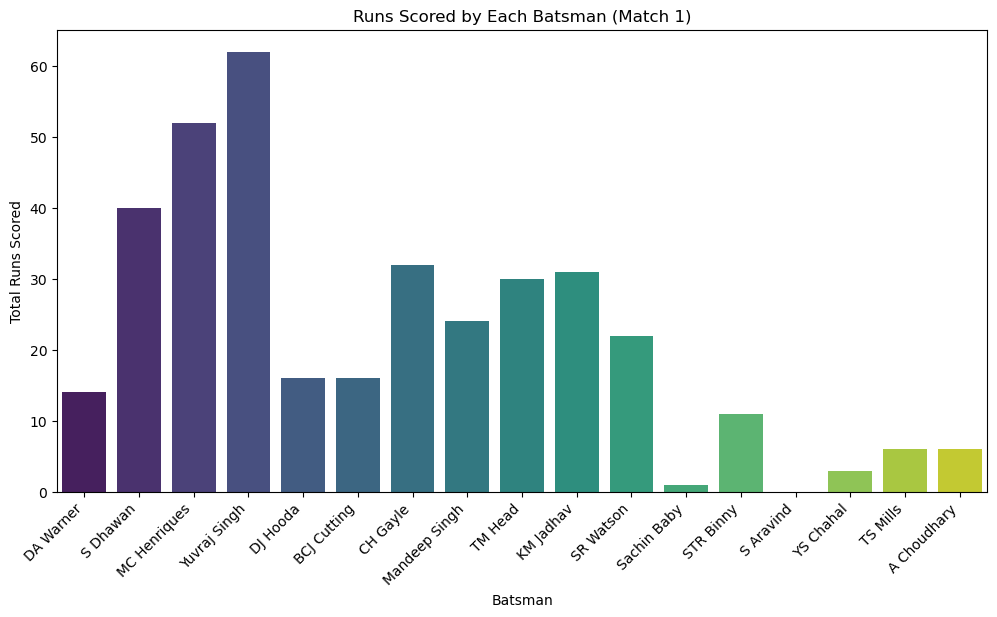

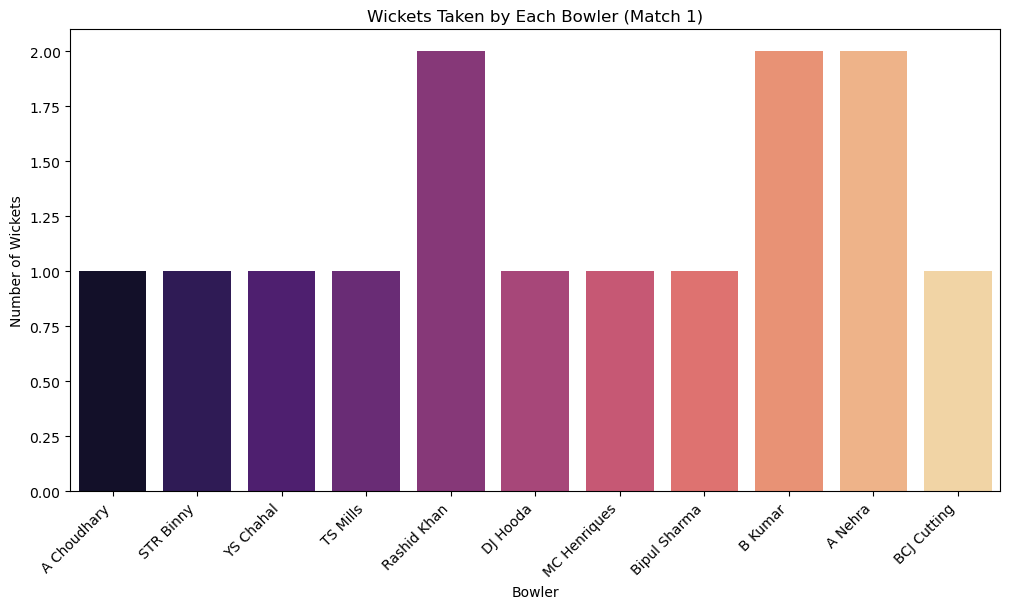

In [30]:
# Filter the data for the specified match_id
match_data = deliveries[deliveries['match_id'] == 1]

# Bar plot for runs scored by each batsman
plt.figure(figsize=(12, 6))
sns.barplot(x='batsman', y='batsman_runs', data=match_data, ci=None, estimator=sum, palette='viridis')
plt.title('Runs Scored by Each Batsman (Match 1)')
plt.xlabel('Batsman')
plt.ylabel('Total Runs Scored')
plt.xticks(rotation=45, ha='right')
plt.show()

# Bar plot for wickets taken by each bowler
plt.figure(figsize=(12, 6))
sns.countplot(x='bowler', data=match_data[match_data['player_dismissed'].notnull()], palette='magma')
plt.title('Wickets Taken by Each Bowler (Match 1)')
plt.xlabel('Bowler')
plt.ylabel('Number of Wickets')
plt.xticks(rotation=45, ha='right')
plt.show()

In [31]:
delivery_df['total_runs_y'] = delivery_df['total_runs_y'].astype(float)  # or int, depending on the nature of your data
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [32]:
# runs left 

delivery_df['runs_left'] = delivery_df['total_runs_x']-delivery_df['current_score']

delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,1,0,1.0,NaN,NaN,NaN,1.0,207.0
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0.0,NaN,NaN,NaN,1.0,207.0
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0.0,NaN,NaN,NaN,1.0,207.0
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,2,0,2.0,NaN,NaN,NaN,3.0,205.0
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,4,0,4.0,NaN,NaN,NaN,7.0,201.0


In [33]:
'''
if one ball is played,then balls left = 120-1 = 119........(1)
if two balls are played,then balls left = 120-2 = 118

so similarly if over=1,over has 6 balls right,so 1*6 = 6
now,ball = 1,so 6+1 = 7,now 126-7 = 119,which is same as (1)

so we'll use balls_left = 126-(over*6+current_ball)

'''

# balls left


delivery_df['balls_left'] = 126-(delivery_df['over']*6+delivery_df['ball'])

delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1.0,NaN,NaN,NaN,1.0,207.0,119
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0.0,NaN,NaN,NaN,1.0,207.0,118
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0.0,NaN,NaN,NaN,1.0,207.0,117
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2.0,NaN,NaN,NaN,3.0,205.0,116
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4.0,NaN,NaN,NaN,7.0,201.0,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1.0,NaN,NaN,NaN,152.0,1.0,4
149574,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2.0,NaN,NaN,NaN,154.0,-1.0,3
149575,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1.0,SR Watson,run out,KH Pandya,155.0,-2.0,2
149576,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2.0,NaN,NaN,NaN,157.0,-4.0,1


In [34]:
list(delivery_df['player_dismissed'].unique())[:2]

[nan, 'Mandeep Singh']

In [35]:
# filling nan values with "0"

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")

# now we will convert this player_dismissed col into a boolean col
# if the player is not dismissed then it's 0 else its 1

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x=="0" else "1")

# converting string to int

delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')


delivery_df['player_dismissed'].unique()


array([0, 1])

In [36]:
# Convert 'player_dismissed' to a numerical type (assuming it represents the number of wickets)
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype(float)  # or int, depending on the nature of your data

# Calculate cumulative sum of wickets
wickets = delivery_df.groupby('match_id')['player_dismissed'].cumsum().values

# Calculate remaining wickets
delivery_df['wickets'] = 10 - wickets

# Display the updated DataFrame
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1.0,0.0,NaN,NaN,1.0,207.0,119,10.0
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0.0,0.0,NaN,NaN,1.0,207.0,118,10.0
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0.0,0.0,NaN,NaN,1.0,207.0,117,10.0
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2.0,0.0,NaN,NaN,3.0,205.0,116,10.0
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4.0,0.0,NaN,NaN,7.0,201.0,115,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,1.0,0.0,NaN,NaN,152.0,1.0,4,5.0
149574,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,2.0,0.0,NaN,NaN,154.0,-1.0,3,5.0
149575,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,0,1.0,1.0,run out,KH Pandya,155.0,-2.0,2,4.0
149576,11415,Hyderabad,Mumbai Indians,153,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,2.0,0.0,NaN,NaN,157.0,-4.0,1,4.0


In [37]:
# current run rate

delivery_df['cur_run_rate'] = (delivery_df['current_score']*6)/(120-delivery_df['balls_left'])

# required run rate

delivery_df['req_run_rate'] = (delivery_df['runs_left']*6)/(delivery_df['balls_left'])


delivery_df.head(3)

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,cur_run_rate,req_run_rate
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1.0,0.0,NaN,NaN,1.0,207.0,119,10.0,6.0,10.436975
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0.0,0.0,NaN,NaN,1.0,207.0,118,10.0,3.0,10.525424
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0.0,0.0,NaN,NaN,1.0,207.0,117,10.0,2.0,10.615385


In [38]:
def resultfun(row):
    
    return 1 if row['batting_team'] == row['winner'] else 0

In [39]:
delivery_df['result'] = delivery_df.apply(resultfun,axis=1)
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,cur_run_rate,req_run_rate,result
125,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0.0,NaN,NaN,1.0,207.0,119,10.0,6.0,10.436975,0
126,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0.0,NaN,NaN,1.0,207.0,118,10.0,3.0,10.525424,0
127,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0.0,NaN,NaN,1.0,207.0,117,10.0,2.0,10.615385,0
128,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0.0,NaN,NaN,3.0,205.0,116,10.0,4.5,10.603448,0
129,1,Hyderabad,Sunrisers Hyderabad,208,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0.0,NaN,NaN,7.0,201.0,115,10.0,8.4,10.486957,0


In [40]:
print(delivery_df.columns)

Index(['match_id', 'city', 'winner', 'total_runs_x', 'inning', 'batting_team',
       'bowling_team', 'over', 'ball', 'batsman', 'non_striker', 'bowler',
       'is_super_over', 'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs_y',
       'player_dismissed', 'dismissal_kind', 'fielder', 'current_score',
       'runs_left', 'balls_left', 'wickets', 'cur_run_rate', 'req_run_rate',
       'result'],
      dtype='object')


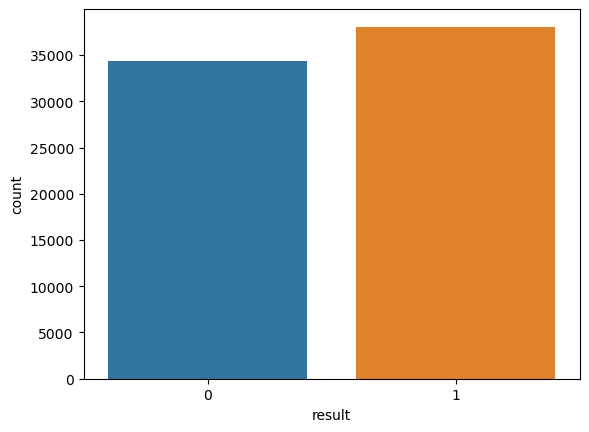

In [41]:
import seaborn as sns

sns.countplot(x='result', data=delivery_df)
plt.show()

In [42]:
delivery_df['result'].unique()

array([0, 1], dtype=int64)

In [43]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left',
                        'balls_left','wickets','total_runs_x','cur_run_rate',
                        'req_run_rate','result']]

final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,cur_run_rate,req_run_rate,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207.0,119,10.0,208,6.0,10.436975,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207.0,118,10.0,208,3.0,10.525424,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207.0,117,10.0,208,2.0,10.615385,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,205.0,116,10.0,208,4.5,10.603448,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,201.0,115,10.0,208,8.4,10.486957,0


In [44]:
final_df.shape

(72413, 10)

In [45]:
final_df.isnull().sum()

batting_team      0
bowling_team      0
city            832
runs_left         0
balls_left        0
wickets           0
total_runs_x      0
cur_run_rate      0
req_run_rate      5
result            0
dtype: int64

In [46]:
# dropping of null values


final_df = final_df.dropna()

final_df.isnull().sum()

batting_team    0
bowling_team    0
city            0
runs_left       0
balls_left      0
wickets         0
total_runs_x    0
cur_run_rate    0
req_run_rate    0
result          0
dtype: int64

In [47]:
final_df = final_df[final_df['balls_left'] != 0]

<span style="display: block; padding: 10px; background-color: lightpink; color: black; font-weight: bold; text-align: left; font-size: 24px;">Step 4: Data Preprocessing</span>

In [48]:
data = final_df.copy()

test = data['result']

train = data.drop(['result'],axis = 1)

train.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,cur_run_rate,req_run_rate
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207.0,119,10.0,208,6.0,10.436975
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207.0,118,10.0,208,3.0,10.525424
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,207.0,117,10.0,208,2.0,10.615385
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,205.0,116,10.0,208,4.5,10.603448
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,201.0,115,10.0,208,8.4,10.486957


In [49]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(train,test,test_size=0.2,random_state=1)

X_train.shape,X_test.shape

((57073, 9), (14269, 9))

In [50]:
X_train.columns

Index(['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left',
       'wickets', 'total_runs_x', 'cur_run_rate', 'req_run_rate'],
      dtype='object')

<span style="display: block; padding: 10px; background-color: lightpink; color: black; font-weight: bold; text-align: left; font-size: 24px;">Step 5: Machine Learning Model Development</span>

In [51]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [52]:
# batting team,bowling team and city are categorical columns
# they will be converted to numeric using onehot encoder

cf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
],remainder='passthrough')


In [53]:
# creating the pipeline


pipe = Pipeline(steps=[
    ('step1',cf),
    ('step2',LogisticRegression(solver='liblinear'))
])

# fitting the training data

pipe.fit(X_train,y_train)

C:\Users\kavit\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [54]:
y_pred = pipe.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.8063634452309202


In [55]:
pipe.predict_proba(X_test)[10]

array([0.54461567, 0.45538433])

In [56]:
# Selecting Random Forest Classifier

pipe2 = Pipeline(steps=[
    ('step1',cf),
    ('step2',RandomForestClassifier())
])

pipe2.fit(X_train,y_train)
print(metrics.accuracy_score(y_test,pipe2.predict(X_test)))

C:\Users\kavit\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


0.9991590160487771


In [57]:
# oth index is loose prob and 1st index is win prob

pipe2.predict_proba(X_test)[10]

array([0.04, 0.96])

In [58]:
'''
I will go with Logistic Regression because i need to 
showcase the probability right,even though Random Forest is 
giving much accurate result,but RandomForest is being baised
at one side,as you can observe the prob of winning for 10th sample
is shown as 98% and 2% loose prob,this is kind of tooo strong or may
be sometimes unrealistic,so its better to use a model which gives equal 
justice towards both side,as we also don't know which team will outperform 
and win the game!

'''

"\nI will go with Logistic Regression because i need to \nshowcase the probability right,even though Random Forest is \ngiving much accurate result,but RandomForest is being baised\nat one side,as you can observe the prob of winning for 10th sample\nis shown as 98% and 2% loose prob,this is kind of tooo strong or may\nbe sometimes unrealistic,so its better to use a model which gives equal \njustice towards both side,as we also don't know which team will outperform \nand win the game!\n\n"

In [59]:
# saving the logistic regression model

import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))